In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot

In [2]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist

In [3]:
# mnist["data"].shape

checkpoint1

In [4]:
# dict={}
# i=1
# for col in mnist["data"].columns:
#     dict[col]=f"X{i}"
#     i+=1
# Data=mnist["data"]
# Data.rename(columns=dict,
#           inplace=True)

In [5]:
# for i in range(0,10):
#     Data.insert(len(Data.columns),f"Y{i}",0,True)
# Target=mnist["target"]
# for i in range(0,7000):
#     t=int(Target[i])
#     Data.iloc[i,-10+t]=1

In [6]:
data_Y = pd.read_csv('training_labels.txt',header=None)
data_Y


,0
0,0
1,4
2,4
3,7
4,7
...,...
4995,3
4996,6
4997,3
4998,9


In [7]:
data_X = pd.read_csv("training_images.txt", delimiter='\t', header=None)
for i in range(784):
    data_X.rename(columns={i : 'x'+str(i+1)}, inplace=True)
data_X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [8]:
def displayData(data_X, indices, example_width=None, figsize=(14, 14)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    X1 = data_X.iloc[:,:].values
    X = X1[rand_indices, :]
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

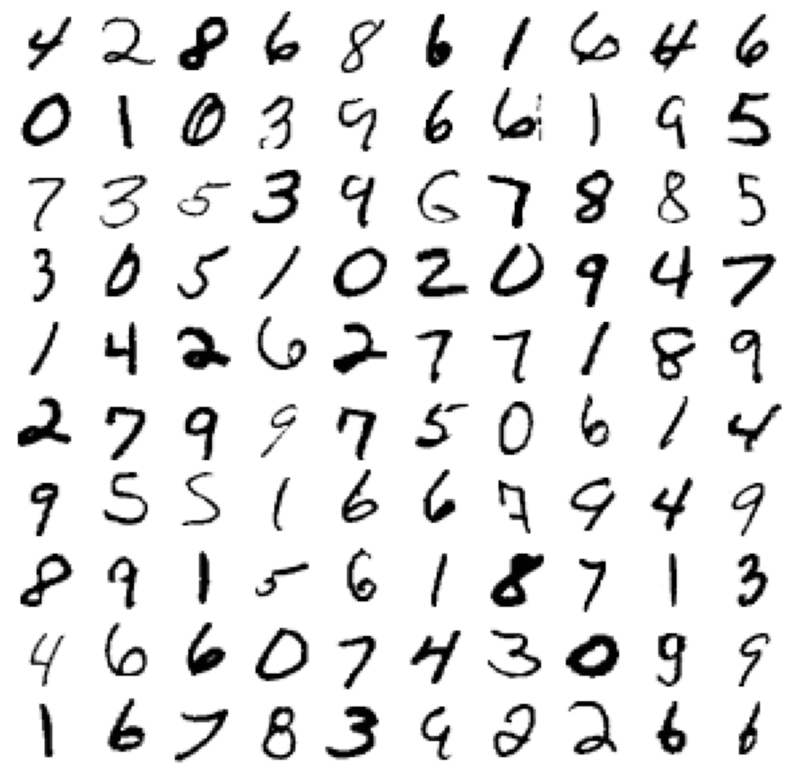

In [9]:
rand_indices = np.random.choice(5000, 100, replace=False)
displayData(data_X, rand_indices)

In [10]:
for i in range(10):
    data_X["y"+str(i)] = (data_Y.loc[:,0] == i)*1
Data = data_X

In [103]:
Data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
Data.shape

(5000, 794)

In [12]:
Training_Set = Data.iloc[0:3750,:]
Testing_Set = Data.iloc[3750:,:]

Check Point 2
Implementing forward propagations to a row of Data,
inputs:X1-X784 list , W(1),w(2)
outputs:activations of hidden layer and output layer

Creatinng W1 AND W2 of dimensions n X 785 and 10 x n+1


In [272]:
def g(x):
#     if x > 500:
#         return 1
#     elif x < -500:
#         return 0
#     else:
    return 1/(1+math.exp(-x))
    

In [337]:
# Initializing Weights
n = 120
e1=math.sqrt(6)/(math.sqrt(784)+math.sqrt(n))
W1 = 2*e1*(np.random.rand(n,785)-1/2) 
e2=math.sqrt(6)/(math.sqrt(n)+math.sqrt(10))
W2 = 2*e2*(np.random.rand(10,n+1)-1/2)

In [338]:
def predict(X,W1,W2):
    z1=np.dot(W1[:,1:],X)+W1[:,0]
    a1= np.array([g(xi) for xi in z1])
    z2=np.dot(W2[:,1:],a1)+W2[:,0]
    a2=np.array([g(xi) for xi in z2])
    result=np.where(a2==np.amax(a2))[0]
    return int(result)

def point_cost(a2,y):
    Cost=0
    for i in range(0,10):
        Cost=Cost+y[i]*math.log(a2[i]+1e-250)+(1-y[i])*math.log(1-a2[i]+1e-250)
    return Cost
        
def accuracy(X, Y, W1, W2):
    correct=0
    total = X.shape[0]
    for i in range(0, total):
        a = predict(X[i], W1, W2)
        b = int(np.where(Y[i] == np.amax(Y[i]))[0])
        if(a==b): correct += 1
    return 100*correct/total

def Error_cross_entropy(X, Y,W1,W2):
    error=0
    n = X.shape[0]
    for i in range(n):
        a1, a2= forward_propagation(W1, W2, X[i], Y[i])
        error += point_cost(a2,y)
    error /= n
    return error

def square_error(X, Y, W1, W2):
    error=0
    n = X.shape[0]
    for i in range(n):
        a1, a2=forward_propagation(W1, W2, X[i],Y[i])
        for i in range(10):
            error += (a2[i]-y[i])**2
#         error = ((a2 - y)**2).mean()
    error /= n*10
    return error

In [339]:
def forward_propagation(W1, W2, x, y):
    z1 = np.dot(W1[:,1:],x) + W1[:,0]
    a1 = np.vectorize(g)(z1)
    z2 = np.dot(W2[:,1:],a1) +W2[:,0]
    a2 = np.vectorize(g)(z2)
    return a1, a2

def backward_propagation(x,a1,a2,y,W1,W2):
    del_2 = a2 - y
    del_g = np.vectorize(lambda x: x*(1-x))(a1)
    partial_del_1 = np.dot(del_2,W2[:,1:])
    del_1 = np.array([partial_del_1[i]*a1[i]*(1-a1[i]) for i in range(0,a1.size)])
    return del_1,del_2

def point_gradient(x,a1,a2,del1,del2,w1,w2):
    Delw2 = np.zeros_like(w2)
    for j in range(0,w2.shape[0]):
        Delw2[j, 0]=del2[j]
        Delw2[j, 1:] = a1 * del2[j]
    Delw1 = np.zeros_like(w1)
    for j in range(0,w1.shape[0]):
        Delw1[j, 0] = del1[j]
        Delw1[j, 1:] = x * del1[j]
    return Delw1,Delw2


In [ ]:
def forward_propagation(W1, W2, x, y):
    z1 = np.dot(W1[:,:,1:],x) + W1[:,:,0]
    a1 = np.vectorize(g)(z1)
    z2 = np.dot(W2[:,:,1:],a1) +W2[:,:,0]
    a2 = np.vectorize(g)(z2)
    return a1, a2

def backward_propagation(x,a1,a2,y,W1,W2):
    del_2 = a2 - y
    del_g = np.vectorize(lambda x: x*(1-x))(a1)
    partial_del_1 = np.dot(del_2,W2[:,:,1:])
    del_1 = np.array([partial_del_1[i]*a1[i]*(1-a1[i]) for i in range(0,a1.size)])
    return del_1,del_2

def point_gradient(x,a1,a2,del1,del2,w1,w2):
    Delw2 = np.zeros_like(w2)
    for j in range(0,w2.shape[0]):
        Delw2[j, 0]=del2[j]
        Delw2[j, 1:] = a1 * del2[j]
    Delw1 = np.zeros_like(w1)
    for j in range(0,w1.shape[0]):
        Delw1[j, 0] = del1[j]
        Delw1[j, 1:] = x * del1[j]
    return Delw1,Delw2

In [340]:
def gradient_descent(Training_Set,Validation_Set, W1, W2):
    n=Training_Set.shape[0]
    XY_train = Training_Set.to_numpy()
    X, Y = XY_train[:, 0:784], XY_train[:, 784:]
    XY_val = Validation_Set.to_numpy()
    X_val, Y_val = XY_val[:, 0:784], XY_val[:, 784:]
    for epoch in range(0,401):
        print("Iteration", epoch, end='\r', flush=True)
        DW1 = np.zeros_like(W1)
        DW2 = np.zeros_like(W2)
        for i in range(0,n):
            x, y = X[i], Y[i]
            a1, a2 = forward_propagation(W1, W2, x, y)
            del_1, del_2 = backward_propagation(x, a1, a2, y, W1, W2)
            del_w1, del_w2 = point_gradient(x, a1, a2, del_1, del_2, W1, W2)
            DW1 += del_w1
            DW2 += del_w2
        W1 = W1 - 0.1 * (DW1/n)
        W2 = W2 - 0.1 * (DW2/n)
        if epoch % 10 == 0:
            print(f"------ Training {epoch}------")
            print("MSE:",square_error(X, Y,W1,W2))
            print("Cross Entropy:",Error_cross_entropy(X, Y, W1, W2))
            print("% Accuracy:",accuracy(X, Y,W1,W2))    
            print(f"------ Validation {epoch} ------")
            print("MSE:",square_error(X_val, Y_val,W1,W2))
            print("Cross Entropy:",Error_cross_entropy(X_val, Y_val, W1, W2))
            print("% Accuracy:",accuracy(X_val, Y_val,W1,W2))    
            print('-'*100)

In [341]:
gradient_descent(Training_Set,Testing_Set, W1, W2)

------ Training 0------
MSE: 2.7789170315478796e-05
Cross Entropy: -3.7028828018282076
% Accuracy: 9.653333333333334
------ Validation 0 ------
MSE: 7.854200957968285e-05
Cross Entropy: -3.6996010482606114
% Accuracy: 10.0
----------------------------------------------------------------------------------------------------
------ Training 5------
MSE: 2.4911071951707975e-05
Cross Entropy: -3.202614987659323
% Accuracy: 25.013333333333332
------ Validation 5 ------
MSE: 6.906061703761136e-05
Cross Entropy: -3.208595322127703
% Accuracy: 23.28
----------------------------------------------------------------------------------------------------
------ Training 10------
MSE: 2.4972879947220057e-05
Cross Entropy: -3.156812380107532
% Accuracy: 42.50666666666667
------ Validation 10 ------
MSE: 6.812970165728201e-05
Cross Entropy: -3.165413153173045
% Accuracy: 37.52
----------------------------------------------------------------------------------------------------
------ Training 15------
MS

MSE: 3.530143580695663e-05
Cross Entropy: -2.1841240708478225
% Accuracy: 72.72
----------------------------------------------------------------------------------------------------
------ Training 130------
MSE: 2.3419837926065526e-05
Cross Entropy: -2.1106678794238714
% Accuracy: 75.68
------ Validation 130 ------
MSE: 3.4058101971758516e-05
Cross Entropy: -2.1466322707617453
% Accuracy: 73.2
----------------------------------------------------------------------------------------------------
------ Training 135------
MSE: 2.333737591276761e-05
Cross Entropy: -2.0740126328841626
% Accuracy: 75.94666666666667
------ Validation 135 ------
MSE: 3.285442715659451e-05
Cross Entropy: -2.110313534561164
% Accuracy: 73.68
----------------------------------------------------------------------------------------------------
------ Training 140------
MSE: 2.3255327654249e-05
Cross Entropy: -2.0385993525474624
% Accuracy: 76.32
------ Validation 140 ------
MSE: 3.168962239285184e-05
Cross Entropy: 

In [336]:
# now let me check the accuracy of my gradient descent in first 100 points without any training
# Short_Train=Training_Set.iloc[0:100,:]
# accuracy(Short_Train,W1,W2)
# accuracy_2(Short_Train,W1,W2)
# now let me train it using this set and check the accuracy in itself
# gradient_descent(Short_Train,Short_Train,W1,W2)